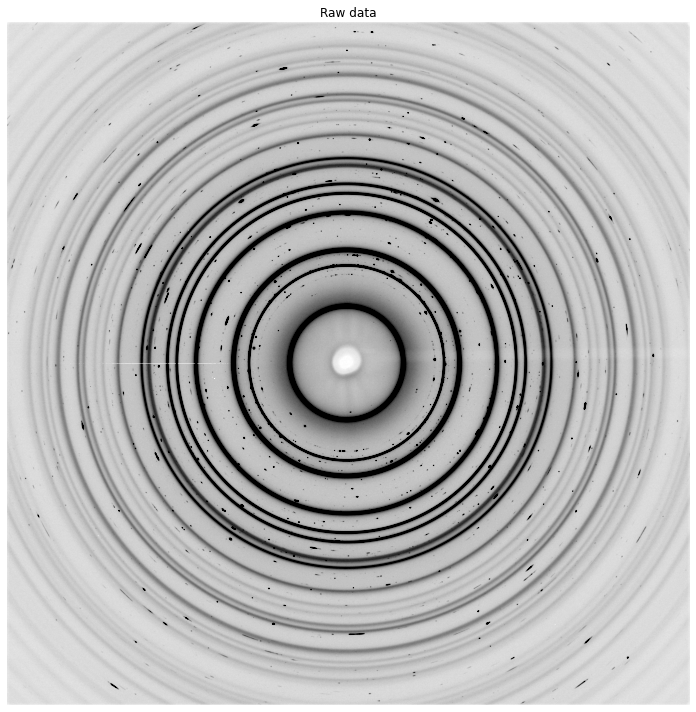

In [1]:
import imageio
import matplotlib.cm as cm
import matplotlib.pyplot as plt

dataset_path = '../data/Nickel/'
xrd_image = imageio.volread(dataset_path + 'Ni83_ch3_RTto950_d700-00001.tif')

### Visualize
plt.figure(figsize=(10,10))
plt.imshow(xrd_image, vmin=0, vmax=15000, cmap='binary', origin='lower')
plt.title('Raw data')
plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
# Get the controls from the Metadata (imctrl file) 
# such as size, pixelSize, IOtth, PolaVal, azmthOff, etc.

from airxd.dataset import parse_imctrl
controls = parse_imctrl(dataset_path+'Si_ch3_d700-00000.imctrl')
print(controls)

{'size': [2880, 2880], 'pixelSize': [150.0, 150.0], 'distance': 688.3615820013158, 'center': [214.76910476613406, 216.3793413304091], 'tilt': 0.1264521336091263, 'rotation': 168.72283307166816, 'azmthOff': 0.0, 'IOtth': [0.8, 17.0], 'DetDepth': 0.019405624916797745, 'PolaVal': [0.9, False]}


In [3]:
# Instantiate masking; Using AutoSpotMask to generate masking.

from airxd.mask import MASK
mask = MASK(controls=controls, shape=(2880,2880))
mask_result = mask.AutoSpotMask(xrd_image, esdmul=3.0)

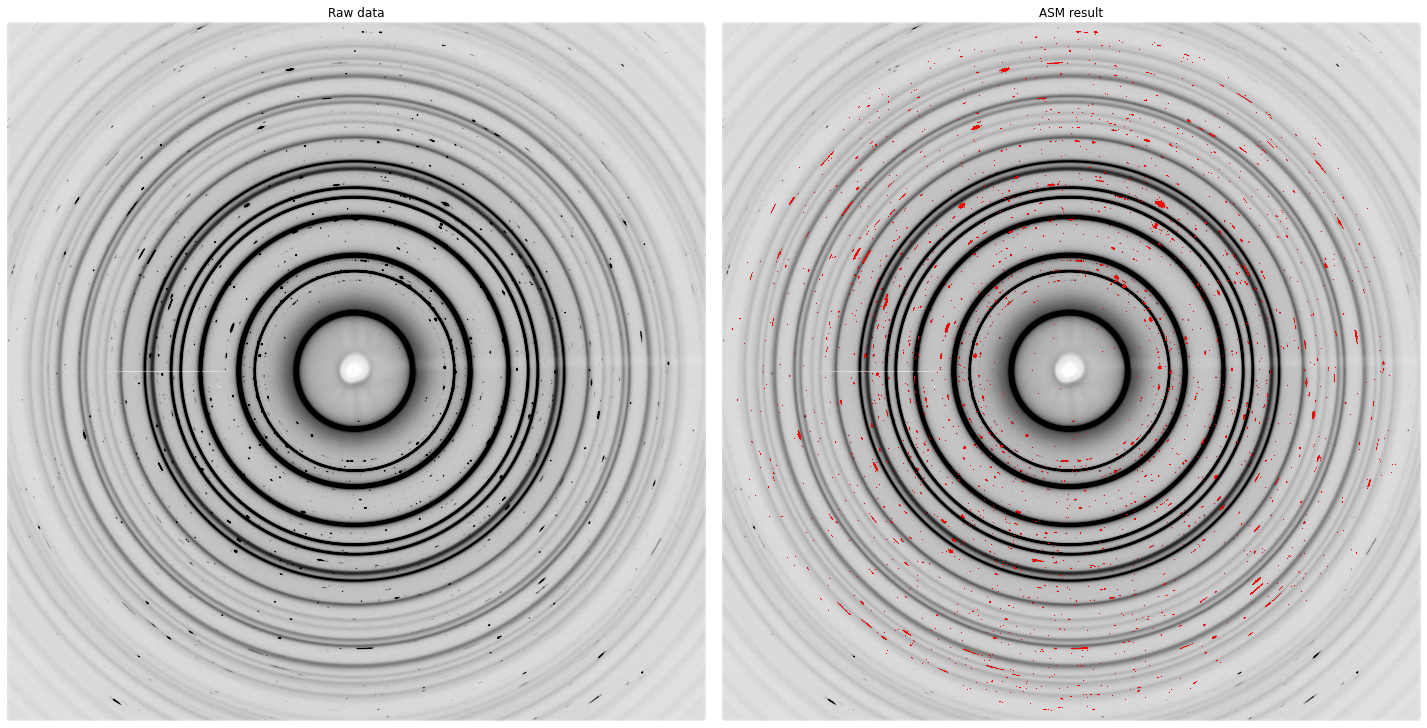

In [4]:
### Visualize

import numpy as np
image, label = xrd_image, mask_result
lbl = np.array(label, dtype=float)
lbl = np.ma.masked_where(lbl==0., lbl)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image, vmin=0, vmax=15000, cmap='binary', origin='lower')
plt.title('Raw data')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image, vmin=0, vmax=15000, cmap='binary', origin='lower')
plt.imshow(lbl, cmap=cm.autumn, origin='lower', interpolation='nearest')
plt.title('ASM result')
plt.axis('off')
plt.tight_layout()
plt.show()